In [1]:
%load_ext watermark


In [2]:
import itertools as it

from IPython.display import display
import numpy as np
import pandas as pd
import polars as pl
import seaborn as sns
from teeplot import teeplot as tp

from pylib.viz._get_nben_cmap import get_nben_cmap
from pylib.viz._get_nben_hue_norm import get_nben_hue_norm
from pylib.viz._size_fixation_cliffplot import size_fixation_cliffplot
from pylib.viz._size_fixation_heatmap import size_fixation_heatmap


In [3]:
%watermark -diwmuv -iv


Last updated: 2024-10-16T14:45:09.658974+00:00

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 7.31.1

Compiler    : GCC 11.4.0
OS          : Linux
Release     : 6.5.0-1025-azure
Machine     : x86_64
Processor   : x86_64
CPU cores   : 4
Architecture: 64bit

pandas : 2.2.3
numpy  : 2.1.2
seaborn: 0.13.2
polars : 1.9.0
teeplot: 1.1.3

Watermark: 2.4.3



In [4]:
teeplot_subdir = "wse-5050-spatial2d-2048atile-traits"
teeplot_subdir


'wse-5050-spatial2d-2048atile-traits'

## Prep Data


In [5]:
dfxs = pd.concat(
    [
        pd.read_parquet("https://osf.io/b7xzc/download"),
        pd.read_parquet("https://osf.io/mz7wt/download"),
        pd.read_parquet("https://osf.io/7r8hx/download"),
        pd.read_parquet("https://osf.io/369g8/download"),
        pd.read_parquet("https://osf.io/d29z6/download"),
        pd.read_parquet("https://osf.io/s6mwg/download"),
    ],
)
display(dfxs.describe()), display(dfxs.head()), display(dfxs.tail());


,group,trait value,replicate,population size,available beneficial mutations,fixation probability
count,7.185192e+06,7185252.0,7.185252e+06,7.185252e+06,7.185252e+06,7185252.0
mean,2.449787e+05,0.5,9.080896e+18,3.276156e+04,3.500007e+00,0.5
std,1.568082e+05,0.5,6.098532e+18,5.440913e+06,1.707822e+00,0.5
min,0.000000e+00,0.0,1.467744e+17,2.048000e+03,1.000000e+00,0.0
25%,1.059420e+05,0.0,2.757147e+18,2.048000e+03,2.000000e+00,0.0
50%,2.320575e+05,0.5,8.846179e+18,2.048000e+03,4.000000e+00,0.5
75%,3.817490e+05,1.0,1.682561e+19,2.048000e+03,5.000000e+00,1.0
max,5.314400e+05,1.0,1.828518e+19,1.526784e+09,6.000000e+00,1.0


,group,trait value,replicate,population size,available beneficial mutations,fixation probability,genotype
0,55850.0,1,16825614873354347384,2048,1,1.0,hypermutator
1,275899.0,0,16825614873354347384,2048,1,0.0,normomutator
2,2466.0,1,16825614873354347384,2048,1,0.0,hypermutator
3,222357.0,0,16825614873354347384,2048,1,0.0,normomutator
4,93746.0,1,16825614873354347384,2048,1,1.0,hypermutator


,group,trait value,replicate,population size,available beneficial mutations,fixation probability,genotype
1197529,NaN,0,13602668054618949450,1526784000,6,0.0,normomutator
1197530,NaN,1,3096681928216550301,1526784000,6,1.0,hypermutator
1197531,NaN,0,3096681928216550301,1526784000,6,0.0,normomutator
1197532,NaN,0,9040591653004920882,1526784000,6,0.0,normomutator
1197533,NaN,1,9040591653004920882,1526784000,6,1.0,hypermutator


In [6]:
apn = dfxs["population size"].min()  # agents per node
apn


np.uint64(2048)

## Size Fixation Curves


teeplots/wse-5050-spatial2d-2048atile-traits/col=available-beneficial-mutations+errorbar=sd+hue=genotype+kind=line+style=genotype+viz=relplot+x=population-size+y=fixation-probability+ext=.pdf
teeplots/wse-5050-spatial2d-2048atile-traits/col=available-beneficial-mutations+errorbar=sd+hue=genotype+kind=line+style=genotype+viz=relplot+x=population-size+y=fixation-probability+ext=.png


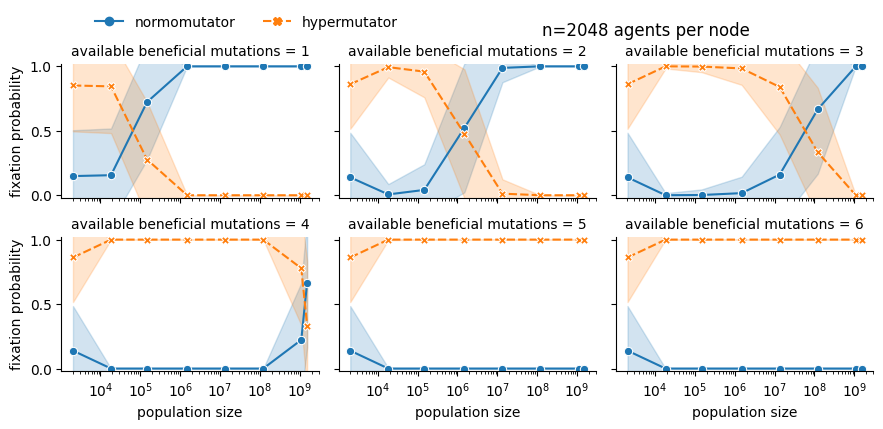

teeplots/wse-5050-spatial2d-2048atile-traits/col=available-beneficial-mutations+errorbar=se+hue=genotype+kind=line+style=genotype+viz=relplot+x=population-size+y=fixation-probability+ext=.pdf
teeplots/wse-5050-spatial2d-2048atile-traits/col=available-beneficial-mutations+errorbar=se+hue=genotype+kind=line+style=genotype+viz=relplot+x=population-size+y=fixation-probability+ext=.png


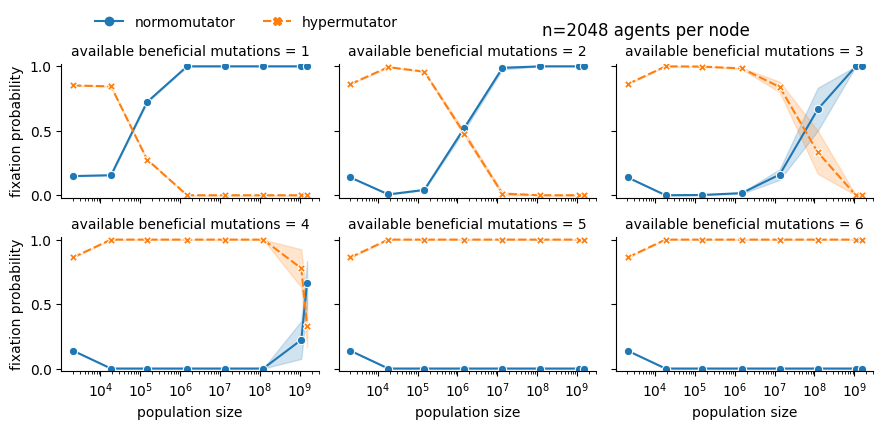

teeplots/wse-5050-spatial2d-2048atile-traits/col=available-beneficial-mutations+errorbar=ci+hue=genotype+kind=line+style=genotype+viz=relplot+x=population-size+y=fixation-probability+ext=.pdf
teeplots/wse-5050-spatial2d-2048atile-traits/col=available-beneficial-mutations+errorbar=ci+hue=genotype+kind=line+style=genotype+viz=relplot+x=population-size+y=fixation-probability+ext=.png


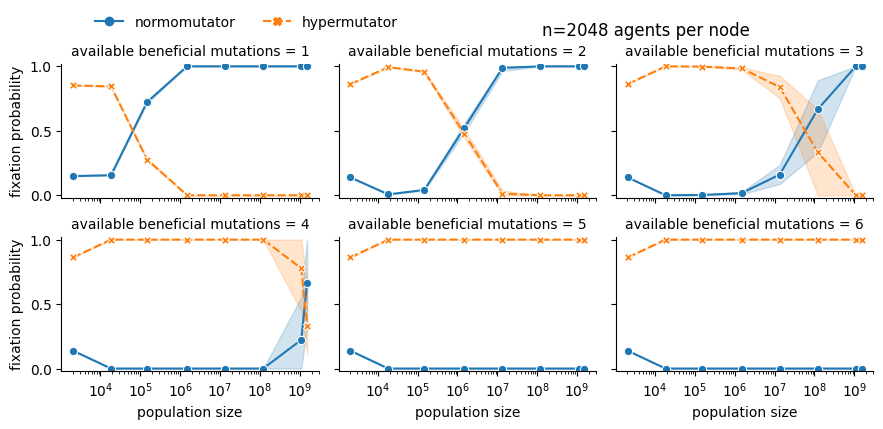

teeplots/wse-5050-spatial2d-2048atile-traits/col=available-beneficial-mutations+hue=genotype+kind=line+style=genotype+viz=relplot+x=population-size+y=fixation-probability+ext=.pdf
teeplots/wse-5050-spatial2d-2048atile-traits/col=available-beneficial-mutations+hue=genotype+kind=line+style=genotype+viz=relplot+x=population-size+y=fixation-probability+ext=.png


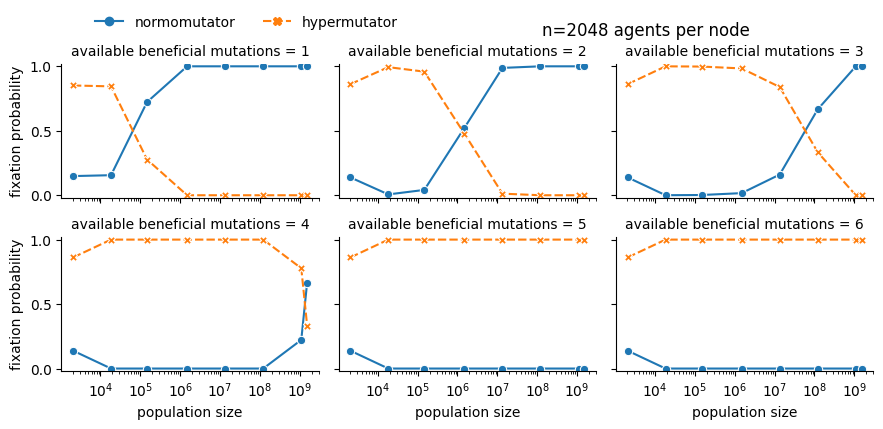

In [7]:
for errorbar in "sd", "se", "ci", None:
    tp.tee(
        sns.relplot,
        data=dfxs,
        x="population size",
        y="fixation probability",
        hue="genotype",
        hue_order=["normomutator", "hypermutator"],
        col="available beneficial mutations",
        style="genotype",
        style_order=["normomutator", "hypermutator"],
        aspect=1.5,
        col_wrap=3,
        errorbar=errorbar,
        height=2,
        kind="line",
        markers=True,
        teeplot_outexclude="post",
        teeplot_subdir=teeplot_subdir,
        teeplot_postprocess=f"""
teed.set(xscale="log", ylim=(-0.02, 1.02))
teed.figure.suptitle("n={apn} agents per node", x=0.63, y=1.02)
teed.set_titles(col_template="{{col_var}} = {{col_name:.0f}}")
sns.move_legend(
    teed,
    "lower center",
    bbox_to_anchor=(0.25, 0.97),
    frameon=False,
    ncol=2,
    title=None,
)
""",
    )


teeplots/wse-5050-spatial2d-2048atile-traits/errorbar=sd+hue=available-beneficial-mutations+kind=line+viz=relplot+x=population-size+y=fixation-probability+ext=.pdf
teeplots/wse-5050-spatial2d-2048atile-traits/errorbar=sd+hue=available-beneficial-mutations+kind=line+viz=relplot+x=population-size+y=fixation-probability+ext=.png


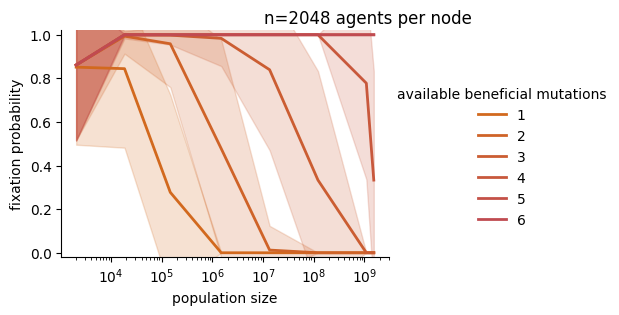

teeplots/wse-5050-spatial2d-2048atile-traits/errorbar=se+hue=available-beneficial-mutations+kind=line+viz=relplot+x=population-size+y=fixation-probability+ext=.pdf
teeplots/wse-5050-spatial2d-2048atile-traits/errorbar=se+hue=available-beneficial-mutations+kind=line+viz=relplot+x=population-size+y=fixation-probability+ext=.png


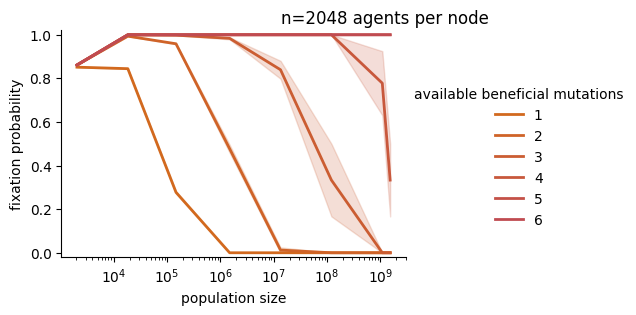

teeplots/wse-5050-spatial2d-2048atile-traits/errorbar=ci+hue=available-beneficial-mutations+kind=line+viz=relplot+x=population-size+y=fixation-probability+ext=.pdf
teeplots/wse-5050-spatial2d-2048atile-traits/errorbar=ci+hue=available-beneficial-mutations+kind=line+viz=relplot+x=population-size+y=fixation-probability+ext=.png


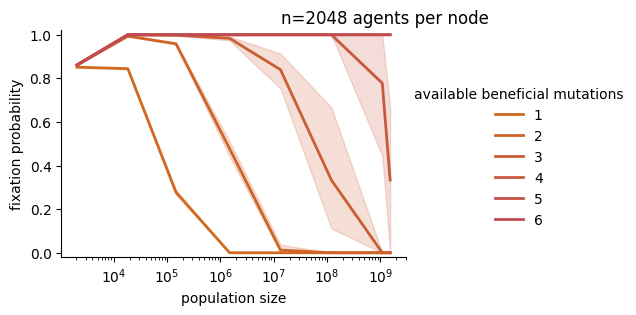

teeplots/wse-5050-spatial2d-2048atile-traits/hue=available-beneficial-mutations+kind=line+viz=relplot+x=population-size+y=fixation-probability+ext=.pdf
teeplots/wse-5050-spatial2d-2048atile-traits/hue=available-beneficial-mutations+kind=line+viz=relplot+x=population-size+y=fixation-probability+ext=.png


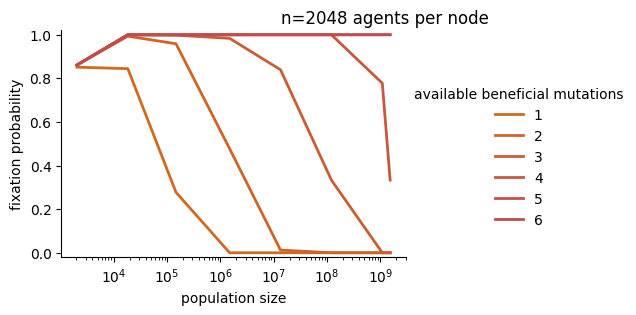

In [8]:
for errorbar in "sd", "se", "ci", None:
    tp.tee(
        sns.relplot,
        data=dfxs[dfxs["genotype"] == "hypermutator"],
        x="population size",
        y="fixation probability",
        hue="available beneficial mutations",
        aspect=1.5,
        height=3,
        kind="line",
        errorbar=errorbar,
        linewidth=2,
        markers=True,
        palette=get_nben_cmap(),
        hue_norm=get_nben_hue_norm(),
        teeplot_outexclude="post",
        teeplot_postprocess=f"""
teed.set(xscale="log", ylim=(-0.02, 1.02))
teed.figure.suptitle("n={apn} agents per node", x=0.63, y=1.02)
teed.set_titles(col_template='{{col_var}} = {{col_name:.0f}}')
""",
        teeplot_subdir=teeplot_subdir,
    )


## Size Fixation Cliffplot


In [9]:
dfxs["available\nbeneficial mutations"] = dfxs[
    "available beneficial mutations"
]


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/home/runner/work/hypermutator-dynamics/hypermutator-dynamics/binder/pylib/viz/_size_fixation_cliffplot.py:78: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  dummy_ax.set_xlim(xvals.min(), xvals.max())


teeplots/wse-5050-spatial2d-2048atile-traits/col=population-size+col-label=+errorbar=ci+hue=genotype+viz=size-fixation-cliffplot+x=fixation-probability+y=available-beneficial-mutations+ext=.pdf
teeplots/wse-5050-spatial2d-2048atile-traits/col=population-size+col-label=+errorbar=ci+hue=genotype+viz=size-fixation-cliffplot+x=fixation-probability+y=available-beneficial-mutations+ext=.png


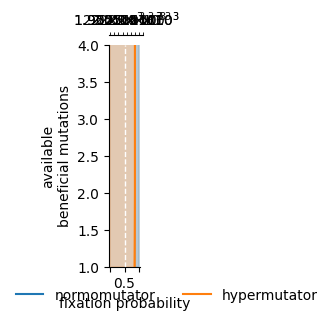

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/home/runner/work/hypermutator-dynamics/hypermutator-dynamics/binder/pylib/viz/_size_fixation_cliffplot.py:78: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  dummy_ax.set_xlim(xvals.min(), xvals.max())


teeplots/wse-5050-spatial2d-2048atile-traits/col=population-size+col-label=+hue=genotype+viz=size-fixation-cliffplot+x=fixation-probability+y=available-beneficial-mutations+ext=.pdf
teeplots/wse-5050-spatial2d-2048atile-traits/col=population-size+col-label=+hue=genotype+viz=size-fixation-cliffplot+x=fixation-probability+y=available-beneficial-mutations+ext=.png


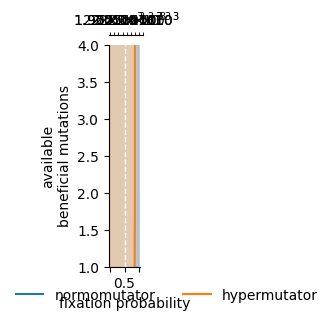

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/home/runner/work/hypermutator-dynamics/hypermutator-dynamics/binder/pylib/viz/_size_fixation_cliffplot.py:78: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  dummy_ax.set_xlim(xvals.min(), xvals.max())


teeplots/wse-5050-spatial2d-2048atile-traits/col=population-size+errorbar=ci+hue=genotype+viz=size-fixation-cliffplot+x=fixation-probability+y=available-beneficial-mutations+ext=.pdf
teeplots/wse-5050-spatial2d-2048atile-traits/col=population-size+errorbar=ci+hue=genotype+viz=size-fixation-cliffplot+x=fixation-probability+y=available-beneficial-mutations+ext=.png


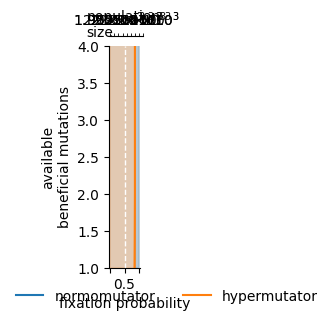

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/home/runner/work/hypermutator-dynamics/hypermutator-dynamics/binder/pylib/viz/_size_fixation_cliffplot.py:78: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  dummy_ax.set_xlim(xvals.min(), xvals.max())


teeplots/wse-5050-spatial2d-2048atile-traits/col=population-size+hue=genotype+viz=size-fixation-cliffplot+x=fixation-probability+y=available-beneficial-mutations+ext=.pdf
teeplots/wse-5050-spatial2d-2048atile-traits/col=population-size+hue=genotype+viz=size-fixation-cliffplot+x=fixation-probability+y=available-beneficial-mutations+ext=.png


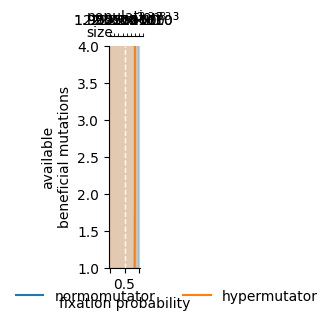

In [10]:
for col_label, errorbar in it.product(
    ["", None],
    ["ci", None],
):    tp.tee(
        size_fixation_cliffplot,
        fixprobs_df=dfxs[
            # exclude non-4-scaled wafer-filling data
            np.isclose(
                np.mod(
                    np.log(dfxs["population size"] // apn) / np.log(4), 1.0
                ),
                0.0,
            )
        ].reset_index(drop=True),
        x="fixation probability",
        y="available\nbeneficial mutations",
        col="population size",
        hue="genotype",
        hue_order=["normomutator", "hypermutator"],
        col_label=col_label,
        errorbar=errorbar,
        ylim=(1, 4),
        teeplot_subdir=teeplot_subdir,
    )


## Size Fixation Heatmap


teeplots/wse-5050-spatial2d-2048atile-traits/genotype=hypermutator+index=available-beneficial-mutations+on=population-size+values=fixation-probability+viz=size-fixation-heatmap+ext=.pdf
teeplots/wse-5050-spatial2d-2048atile-traits/genotype=hypermutator+index=available-beneficial-mutations+on=population-size+values=fixation-probability+viz=size-fixation-heatmap+ext=.png


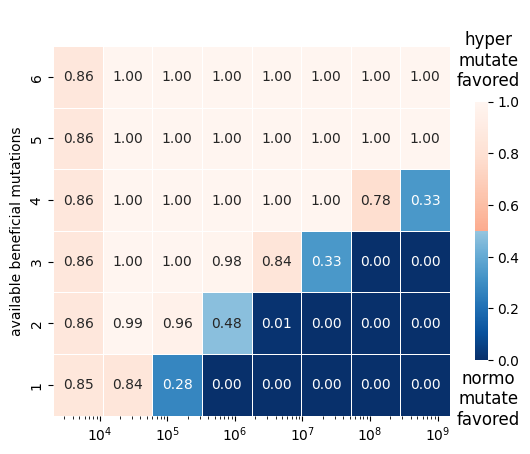

<Axes: ylabel='available beneficial mutations'>

In [11]:
tp.tee(
    size_fixation_heatmap,
    fixprobs_df=dfxs,
    genotype="hypermutator",
    index="available beneficial mutations",
    on="population size",
    values="fixation probability",
    teeplot_subdir=teeplot_subdir,
)


## Quality Check: Number Replicates Available


In [12]:
categories = (
    pl.DataFrame(dfxs)
    .group_by(
        "population size",
    )
    .first()["population size"]
    .sort()
    .cast(pl.String)
    .to_list()
)
categories


['2048',
 '18432',
 '147456',
 '1492992',
 '13436928',
 '120932352',
 '1088391168',
 '1526784000']

In [13]:
dfy = pl.DataFrame(dfxs).with_columns(
    pl.col("population size")
    .cast(pl.String)
    .cast(pl.Enum(categories))
    .alias("population size cat"),
)
display(dfy.describe()), display(dfy.head()), display(dfy.tail());


statistic,group,trait value,replicate,population size,available beneficial mutations,fixation probability,genotype,available beneficial mutations,population size cat
str,f64,f64,f64,f64,f64,f64,str,f64,str
"""count""",7.185192e6,7.185252e6,7.185252e6,7.185252e6,7.185252e6,7.185252e6,"""7185252""",7.185252e6,"""7185252"""
"""null_count""",60.0,0.0,0.0,0.0,0.0,0.0,"""0""",0.0,"""0"""
"""mean""",244978.738245,0.5,9.0809e18,32761.562921,3.500007,0.5,null,3.500007,null
"""std""",156808.197188,0.5,6.0985e18,5.4409e6,1.707822,0.5,null,1.707822,null
"""min""",0.0,0.0,1.4677e17,2048.0,1.0,0.0,null,1.0,null
"""25%""",105942.0,0.0,2.7571e18,2048.0,2.0,0.0,null,2.0,null
"""50%""",232058.0,1.0,8.8462e18,2048.0,4.0,0.997269,null,4.0,null
"""75%""",381749.0,1.0,1.6826e19,2048.0,5.0,1.0,null,5.0,null
"""max""",531440.0,1.0,1.8285e19,1.5268e9,6.0,1.0,null,6.0,null


group,trait value,replicate,population size,available beneficial mutations,fixation probability,genotype,available beneficial mutations,population size cat
f64,u8,u64,u64,i8,f64,cat,i8,enum
55850.0,1,16825614873354347384,2048,1,1.0,"""hypermutator""",1,"""2048"""
275899.0,0,16825614873354347384,2048,1,0.0,"""normomutator""",1,"""2048"""
2466.0,1,16825614873354347384,2048,1,0.0,"""hypermutator""",1,"""2048"""
222357.0,0,16825614873354347384,2048,1,0.0,"""normomutator""",1,"""2048"""
93746.0,1,16825614873354347384,2048,1,1.0,"""hypermutator""",1,"""2048"""


group,trait value,replicate,population size,available beneficial mutations,fixation probability,genotype,available beneficial mutations,population size cat
f64,u8,u64,u64,i8,f64,cat,i8,enum
null,0,13602668054618949450,1526784000,6,0.0,"""normomutator""",6,"""1526784000"""
null,1,3096681928216550301,1526784000,6,1.0,"""hypermutator""",6,"""1526784000"""
null,0,3096681928216550301,1526784000,6,0.0,"""normomutator""",6,"""1526784000"""
null,0,9040591653004920882,1526784000,6,0.0,"""normomutator""",6,"""1526784000"""
null,1,9040591653004920882,1526784000,6,1.0,"""hypermutator""",6,"""1526784000"""


teeplots/wse-5050-spatial2d-2048atile-traits/col=available-beneficial-mutations+hue=genotype+kind=hist+multiple=dodge+viz=displot+x=population-size-cat+ext=.pdf
teeplots/wse-5050-spatial2d-2048atile-traits/col=available-beneficial-mutations+hue=genotype+kind=hist+multiple=dodge+viz=displot+x=population-size-cat+ext=.png


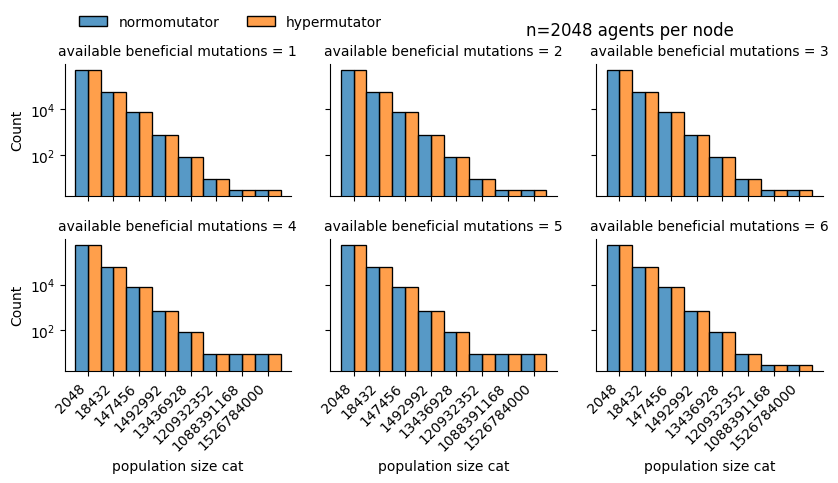

In [14]:
tp.tee(
    sns.displot,
    data=dfy.to_pandas(),
    x="population size cat",
    hue="genotype",
    hue_order=["normomutator", "hypermutator"],
    col="available beneficial mutations",
    aspect=1.5,
    col_wrap=3,
    height=2,
    kind="hist",
    multiple="dodge",
    teeplot_outexclude="post",
    teeplot_postprocess=f"""
teed.set(yscale='log')
teed.figure.suptitle("n={apn} agents per node", x=0.63, y=1.02)
teed.set_titles(col_template='{{col_var}} = {{col_name:.0f}}')
for ax in teed.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)
        label.set_ha("right")
sns.move_legend(
    teed, "lower center",
    bbox_to_anchor=(0.25, 0.97),
    frameon=False,
    ncol=2,
    title=None,
)
""",
    teeplot_subdir=teeplot_subdir,
)


## Quality Check: Has Reached Fixation?


In [15]:
dfxs_ = dfxs[dfxs["genotype"] == "hypermutator"].copy().reset_index(drop=True)


In [16]:
dfxs_["unfixed"] = (dfxs_["fixation probability"] != 1.0) & (
    dfxs_["fixation probability"] > 0.001
)
any_unfixed = dfxs_["unfixed"].any()
any_unfixed


np.True_

teeplots/wse-5050-spatial2d-2048atile-traits/col=available-beneficial-mutations+hue=genotype+kind=scatter+style=genotype+viz=relplot+x=population-size+y=fixation-probability+ext=.pdf
teeplots/wse-5050-spatial2d-2048atile-traits/col=available-beneficial-mutations+hue=genotype+kind=scatter+style=genotype+viz=relplot+x=population-size+y=fixation-probability+ext=.png


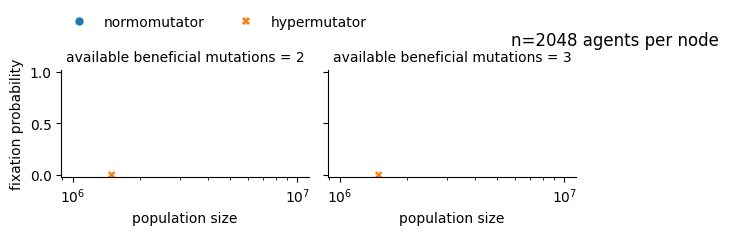

In [17]:
tp.tee(
    sns.relplot,
    data=dfxs_[dfxs_["unfixed"]],
    x="population size",
    y="fixation probability",
    hue="genotype",
    hue_order=["normomutator", "hypermutator"],
    col=[None, "available beneficial mutations"][int(any_unfixed)],
    style="genotype",
    style_order=["normomutator", "hypermutator"],
    aspect=1.5,
    col_wrap=[None, 3][int(any_unfixed)],
    height=2,
    kind="scatter",
    markers=bool(any_unfixed),
    teeplot_outexclude="post",
    teeplot_postprocess=f"""
teed.set(xscale='log', ylim=(-0.02, 1.02))
teed.figure.suptitle("n={apn} agents per node", x=0.63, y=1.02)
teed.set_titles(col_template='{{col_var}} = {{col_name:.0f}}')
try:
    sns.move_legend(
        teed,
        "lower center",
        bbox_to_anchor=(0.25, 0.97),
        frameon=False,
        ncol=2,
        title=None,
    )
except ValueError:
    pass
""",
    teeplot_subdir=teeplot_subdir,
)


teeplots/wse-5050-spatial2d-2048atile-traits/col=available-beneficial-mutations+hue=unfixed+multiple=fill+viz=displot+x=population-size+ext=.pdf
teeplots/wse-5050-spatial2d-2048atile-traits/col=available-beneficial-mutations+hue=unfixed+multiple=fill+viz=displot+x=population-size+ext=.png


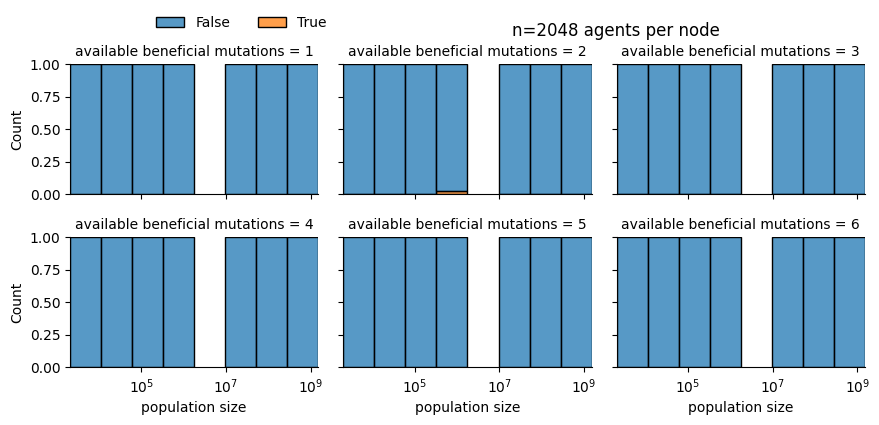

In [18]:
tp.tee(
    sns.displot,
    data=dfxs_.reset_index(drop=True),
    x="population size",
    hue="unfixed",
    col="available beneficial mutations",
    col_wrap=3,
    aspect=1.5,
    height=2,
    multiple="fill",
    bins=dfxs_["population size"].nunique(),
    log_scale=(True, False),
    teeplot_outexclude="post",
    teeplot_postprocess=f"""
teed.figure.suptitle("n={apn} agents per node", x=0.63, y=1.02)
teed.set_titles(col_template='{{col_var}} = {{col_name:.0f}}')
sns.move_legend(
    teed,
    "lower center",
    bbox_to_anchor=(0.25, 0.97),
    frameon=False,
    ncol=2,
    title=None,
)
""",
    teeplot_subdir=teeplot_subdir,
)
